In [374]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import re
from nltk.stem.snowball import SnowballStemmer
import pandas as pd

In [5]:
data = loadmat('ex6data1', mat_dtype=True)

X = data['X']
y = data['y'][:,0]

plt.plot(X[:,0][y==1], X[:,1][y==1], linestyle='', marker='+', color='black')
plt.plot(X[:,0][y==0], X[:,1][y==0], linestyle='', marker='o', color='y')
plt.show()

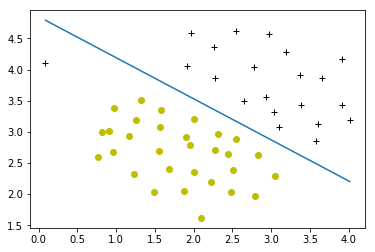

In [41]:
clf = SVC(C=1, kernel='linear')

clf.fit(X,y)

theta = np.concatenate((clf.intercept_, clf.coef_.flatten()))

plt.plot(X[:,0][y==1], X[:,1][y==1], linestyle='', marker='+', color='black')
plt.plot(X[:,0][y==0], X[:,1][y==0], linestyle='', marker='o', color='y')
lspace_x1 = np.linspace(X[:,0].min(), X[:,0].max(), 2)
lspace_x2 = -(theta[0]+theta[1]*lspace_x1)/theta[2]
plt.plot(lspace_x1, lspace_x2)
plt.show()

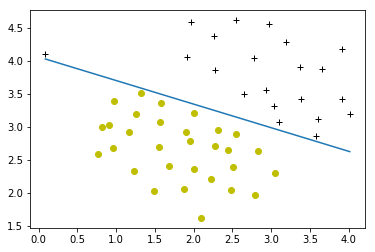

In [52]:
clf = SVC(C=100, kernel='linear')

clf.fit(X,y)

theta = np.concatenate((clf.intercept_, clf.coef_.flatten()))

plt.plot(X[:,0][y==1], X[:,1][y==1], linestyle='', marker='+', color='black')
plt.plot(X[:,0][y==0], X[:,1][y==0], linestyle='', marker='o', color='y')
lspace_x1 = np.linspace(X[:,0].min(), X[:,0].max(), 2)
lspace_x2 = -(theta[0]+theta[1]*lspace_x1)/theta[2]
plt.plot(lspace_x1, lspace_x2)
plt.show()

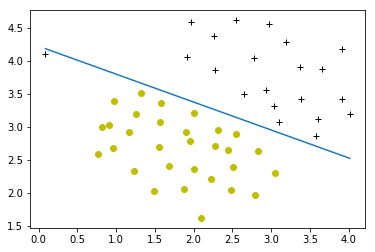

In [54]:
clf = LogisticRegression(C=100)

clf.fit(X,y)

theta = np.concatenate((clf.intercept_, clf.coef_.flatten()))

plt.plot(X[:,0][y==1], X[:,1][y==1], linestyle='', marker='+', color='black')
plt.plot(X[:,0][y==0], X[:,1][y==0], linestyle='', marker='o', color='y')
lspace_x1 = np.linspace(X[:,0].min(), X[:,0].max(), 2)
lspace_x2 = -(theta[0]+theta[1]*lspace_x1)/theta[2]
plt.plot(lspace_x1, lspace_x2)
plt.show()

In [55]:
def gaussianKernel(x1,x2,sigma):
    return np.e**-(((x1-x2)**2).sum()/2/sigma**2)

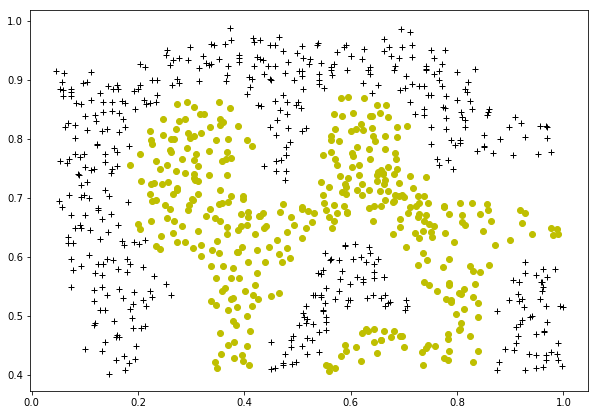

In [159]:
data = loadmat('ex6data2', mat_dtype=True)
X = data['X']
y = data['y'][:,0]
fig = plt.figure(figsize=(10,7))
plt.plot(X[:,0][y==1], X[:,1][y==1], linestyle='', marker='+', color='black')
plt.plot(X[:,0][y==0], X[:,1][y==0], linestyle='', marker='o', color='y')
plt.show()

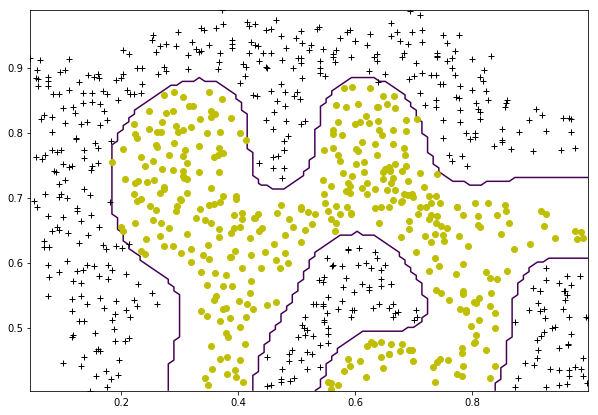

In [214]:
clf = SVC(C=1, kernel='rbf', probability=False, gamma=100)
clf.fit(X,y)

x1vals = np.linspace(X[:,0].min(), X[:,0].max(), 100)
x2vals = np.linspace(X[:,1].min(), X[:,1].max(), 100)
X1, X2 = np.meshgrid(x1vals, x2vals)
preds = np.empty((100,100))
for i in range(X1.shape[1]):
    ftrs = np.concatenate((X1[:,[i]],X2[:,[i]]),axis=1)
    preds[i] = clf.predict(ftrs)
#     break
fig = plt.figure(figsize=(10,7))
plt.plot(X[:,0][y==1], X[:,1][y==1], linestyle='', marker='+', color='black')
plt.plot(X[:,0][y==0], X[:,1][y==0], linestyle='', marker='o', color='y')
plt.contour(X1, X2, preds.T, levels=[.5])
plt.show()

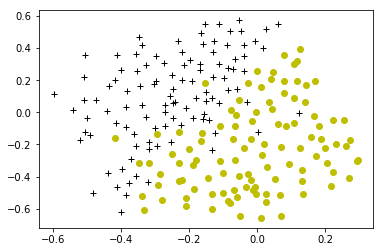

In [227]:
data = loadmat('ex6data3', mat_dtype=True)

X = data['X']
y = data['y'][:,0]
Xval = data['Xval']
yval = data['yval'][:,0]

plt.plot(X[:,0][y==1], X[:,1][y==1], linestyle='', marker='+', color='black')
plt.plot(X[:,0][y==0], X[:,1][y==0], linestyle='', marker='o', color='y')
plt.show()

In [237]:
def dataset3Params(X,y,Xval,yval):
    Cvec = np.array([.01, .03, .1, .3, 1, 3, 10, 30])
    gamma_vec = np.array([.3, 1, 3, 10, 30, 100, 300, 1000])
    best_score=0
    for C in Cvec:
        for gamma in gamma_vec:
            clf = SVC(C=C, kernel='rbf', gamma=gamma)
            clf.fit(X,y)
            prd = clf.predict(Xval)
            if (prd==yval).mean() > best_score:
#                 print((prd==yval).mean())
                best_score = (prd==yval).mean()
                bestC, best_gamma = C, gamma
    return bestC, best_gamma

In [239]:
C, gamma = dataset3Params(X,y,Xval,yval)

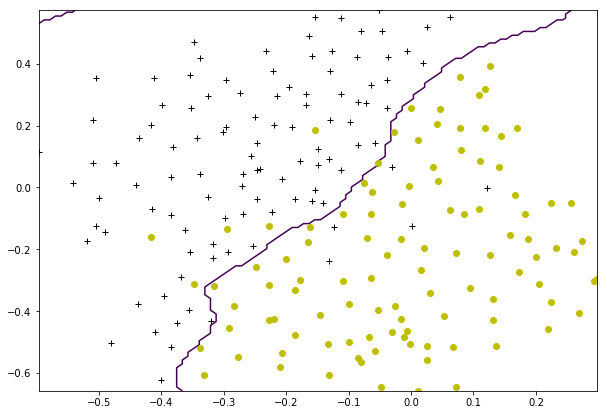

In [242]:
clf = SVC(C=C, kernel='rbf', probability=False, gamma=gamma)
clf.fit(X,y)

x1vals = np.linspace(X[:,0].min(), X[:,0].max(), 100)
x2vals = np.linspace(X[:,1].min(), X[:,1].max(), 100)
X1, X2 = np.meshgrid(x1vals, x2vals)
preds = np.empty((100,100))
for i in range(X1.shape[1]):
    ftrs = np.concatenate((X1[:,[i]],X2[:,[i]]),axis=1)
    preds[i] = clf.predict(ftrs)
#     break
fig = plt.figure(figsize=(10,7))
plt.plot(X[:,0][y==1], X[:,1][y==1], linestyle='', marker='+', color='black')
plt.plot(X[:,0][y==0], X[:,1][y==0], linestyle='', marker='o', color='y')
plt.contour(X1, X2, preds.T, levels=[.5])
plt.show()

In [266]:
vocab = {}
with open('vocab.txt', 'r') as f:
    for line in f:
        val, key = line.split()
        vocab[key] = int(val)

In [350]:
def processEmail(filename, vocab):
    word_indicies = np.array([], dtype=int)
    f = open(filename, 'r')
    st = f.read()
#     header_start = st.find('\n\n')
#     print(header_start)
    st = st.casefold()
    
    htmltag_expr = re.compile(r"(<[^<>]+>)")
    st = re.sub(htmltag_expr, lambda x: ' ', st, count=0, flags=0)
    
    http_expr = re.compile(r"((http|https)://[^\s]*)")
    st = re.sub(http_expr, lambda x: 'httpaddr', st, count=0, flags=0)
    
    email_expr = re.compile(r"([^\s]+@[^\s]+)")
    st = re.sub(email_expr, lambda x: 'emailaddr', st, count=0, flags=0)
    
    no_expr = re.compile(r"([0-9]+)")
    st = re.sub(no_expr, lambda x: 'number', st, count=0, flags=0)
    
    dollar_expr = re.compile(r"([$]+)")
    st = re.sub(dollar_expr, lambda x: 'dollar', st, count=0, flags=0)
    
    stemmer = SnowballStemmer('english')
    st = re.split('[^0-9A-Za-z]', st)
    st = list(filter(lambda x: x!='', st))
    for word in st:
        stem = stemmer.stem(word)
        if stem in vocab.keys():
            word_indicies = np.append(word_indicies, vocab[stem])
#     st = [stemmer.stem(word) for word in st]
#     print((st))
#     print(word_indicies)
    return word_indicies

In [354]:
def emailFeatures(word_indicies, vocab):
    n = len(vocab.keys())
    X = np.zeros(n)
    for val in vocab.values():
        if val in word_indicies:
            X[val] = 1
    return X

In [355]:
sampleInd = processEmail('emailSample1.txt', vocab)

In [393]:
print(list(vocab.keys())[list(vocab.values()).index(966)])

lo


In [365]:
data = loadmat('spamTrain.mat', mat_dtype=True)
data_test = loadmat('spamTest.mat', mat_dtype=True)
X = data['X']
y = data['y'][:,0]
Xtest = data_test['Xtest']
ytest = data_test['ytest'][:,0]

In [370]:
clf = SVC(C=.1, kernel='linear')
clf.fit(X,y)

0.98899999999999999

In [371]:
prd = clf.predict(Xtest)
(prd==ytest).mean()

0.98899999999999999

In [372]:
prd = clf.predict(X)
(prd==y).mean()

0.99824999999999997

In [378]:
coefs = pd.Series(clf.coef_.flatten())

In [395]:
coefs.sort_values(ascending=False)[:15]

1190    0.500614
297     0.465916
1397    0.422869
738     0.383622
1795    0.367710
155     0.345064
476     0.323632
1851    0.269724
1298    0.267298
1263    0.261169
1066    0.257298
1088    0.253941
965     0.253467
698     0.248297
791     0.246404
dtype: float64